In [5]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sympy

In [9]:
def base_iterative_method(f_iter,epsilon,x_0):
    """
    利用不动迭代法逼近方程的根
    :param f_iter: 迭代公式
    :param epsilon: 误差范围
    :param x_0: x*附近的根
    :return: 每次迭代计算获取的x值
    """
    # 首先判断迭代函数的收敛性,即 一阶导数在x_0处的值的绝对值<1
    f_diff = sympy.diff(f_iter,sympy.Symbol('x'))
    if abs(f_diff.evalf(subs={'x':x_0})) > 1 :
        raise Exception('iter function does not converge')


    i = 1 # 迭代次数,初始化为1
    x_next = f_iter.evalf(subs={'x':x_0}) # x_(k+1)
    x_list = [x_0,x_next] # 每次迭代找到的x值

    while abs(x_list[i] - x_list[i-1]) > epsilon:
        i += 1
        x_next = f_iter.evalf(subs={'x': x_list[i-1]})
        x_list.append(x_next)

    return np.array(x_list,dtype='float')

In [26]:
x = sympy.Symbol('x')
f_iter = (x + 1) ** sympy.Rational(1,3)
epsilon = 0.0001
x_0 = 1.5
x_list = base_iterative_method(f_iter,epsilon,x_0)
x_list

array([1.5       , 1.35720881, 1.33086096, 1.32588377, 1.32493936,
       1.32476001, 1.32472595])

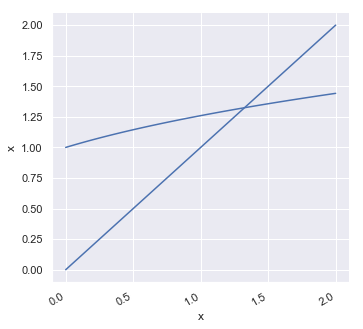

In [58]:
# 迭代函数和y=x相交
f = sympy.lambdify('x',f_iter,'numpy') #convert a SymPy expression to numpy lambda
xx = np.linspace(0,2,100)
yy = f(xx)
sns.set(color_codes=True)
df = pd.DataFrame.from_dict(dict(x=xx,y=yy))
g = sns.relplot(x='x',y='y',data=df,kind='line')
# sns.lmplot(x='x',y='y',ci=None,data=pd.DataFrame.from_dict({'x':[0,2],'y':[0,2]}))
# sns.relplot(x='x',y='x',ci=None,data=df)
g.map(plt.plot,'x','x').add_legend()
g.fig.autofmt_xdate()

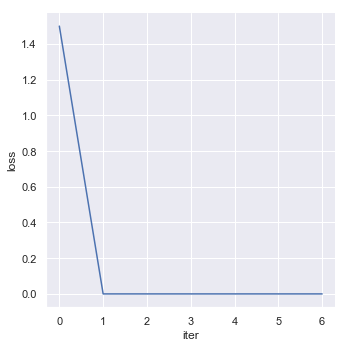

In [68]:
x_list
loss = [0]
loss.extend(x_list[1:]) 
loss = x_list - loss
loss
sns.relplot(x='iter',y='loss',kind='line',data=pd.DataFrame.from_dict(
    dict(iter=range(len(loss)),loss=loss))
)